<h1><center><mark>Task 1</mark></center></h1><h2><li>Implement linear regression model to predict the prices of House based on the square footage and the number of bedrooms and bathrooms</li></h2>

# <mark>Import the libraries</mark>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# <mark>Load the datasets</mark>

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

# <mark>Define the features and target variable</mark>

In [3]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# <mark>Separate the features and target variable from the training data</mark>

In [4]:
X = train_df[features]
y = train_df[target]

# <mark>Split the data into training and validation sets</mark>

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# <mark>Define the preprocessing steps for numeric features</mark>

In [6]:
numeric_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# <mark>Combine the preprocessing steps</mark>

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# <mark>Create a pipeline that includes preprocessing and the regression model</mark>

In [8]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# <mark>Train the model</mark>

In [10]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['GrLivArea', 'BedroomAbvGr',
                                                   'FullBath'])])),
                ('regressor', LinearRegression())])

# <mark>Make predictions on the validation set</mark>

In [11]:
y_val_pred = model.predict(X_val)

# <mark>Calculate the mean squared error</mark>

In [12]:
mse = mean_squared_error(y_val, y_val_pred)
rmse = mse ** 0.5
print(f'Validation RMSE: {rmse}')

Validation RMSE: 52975.71771338122


# <mark>Preprocess the test data and make predictions</mark>

In [13]:
X_test = test_df[features]
test_predictions = model.predict(X_test)

# <mark>Prepare the submission dataframe</mark>

In [14]:
submission_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

# <mark>Save the submission dataframe to a CSV file</mark>

In [15]:
submission_df.to_csv('submission.csv', index=False)
print('Submission file created: submission.csv')

Submission file created: submission.csv


# <mark>Visualizations</mark>

# <mark>Scatter plot with regression line</mark>

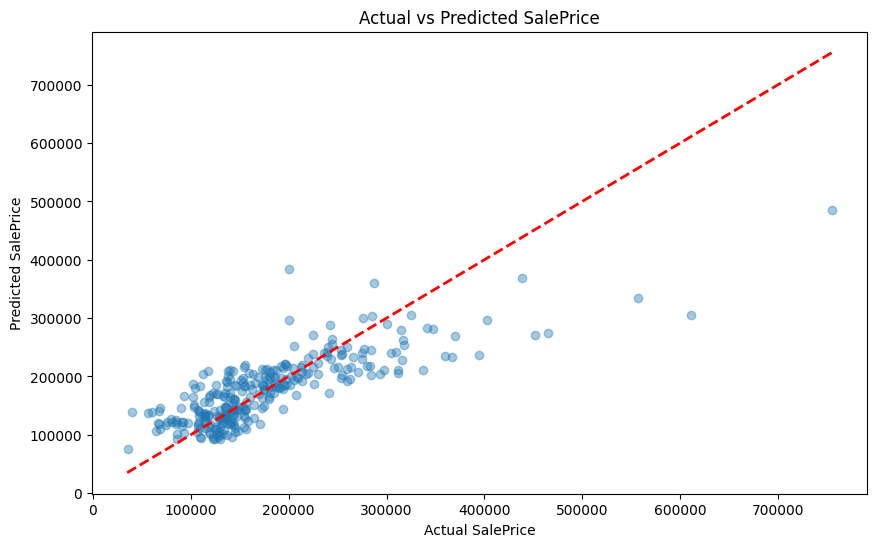

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(y_val, y_val_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

# <mark>Residual plot</mark>

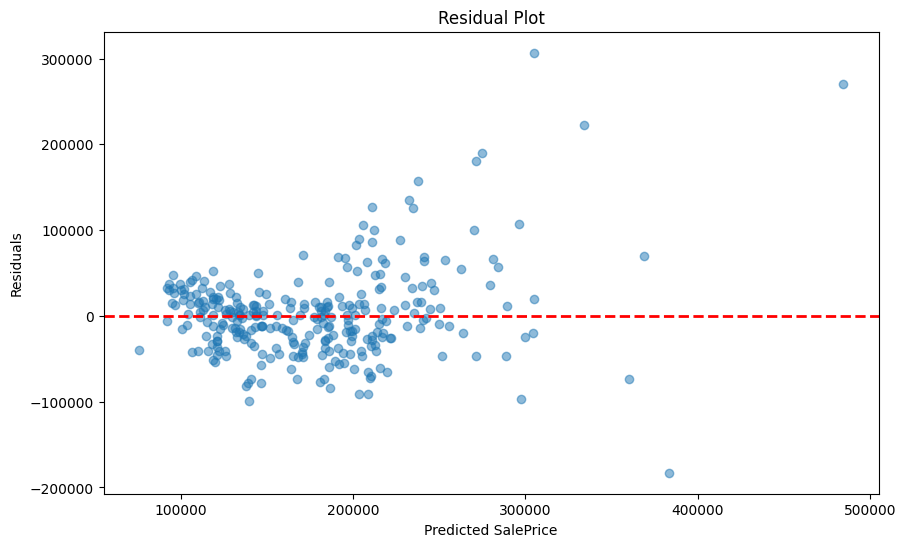

In [38]:
residuals = y_val - y_val_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# <mark>Distribution of residuals</mark>

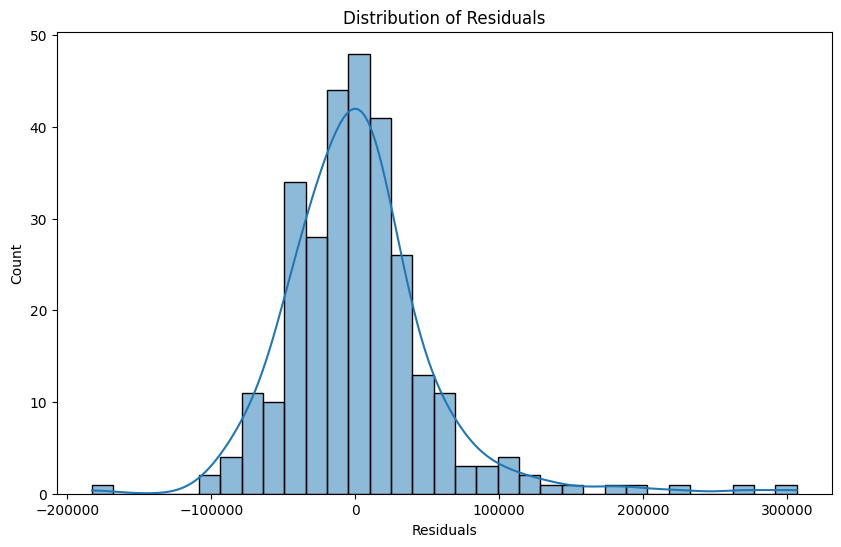

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# <mark>Feature importance</mark>

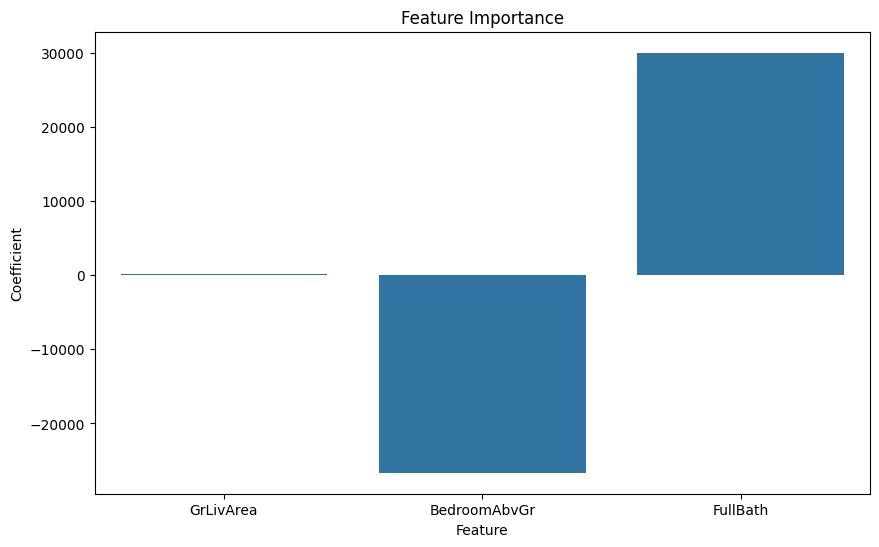

In [19]:
coefficients = model.named_steps['regressor'].coef_
features_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', data=features_df)
plt.title('Feature Importance')
plt.show()

# <center><mark>Thankyou</mark></center>